In [32]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

In [2]:
data = pd.read_excel('Date_Fruit_Datasets.xlsx')

In [3]:
data.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


In [4]:
data.shape

(898, 35)

In [5]:
data['Class'].value_counts()

DOKOL     204
SAFAVI    199
ROTANA    166
DEGLET     98
SOGAY      94
IRAQI      72
BERHI      65
Name: Class, dtype: int64

In [6]:
data.columns

Index(['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY',
       'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO',
       'ROUNDNESS', 'COMPACTNESS', 'SHAPEFACTOR_1', 'SHAPEFACTOR_2',
       'SHAPEFACTOR_3', 'SHAPEFACTOR_4', 'MeanRR', 'MeanRG', 'MeanRB',
       'StdDevRR', 'StdDevRG', 'StdDevRB', 'SkewRR', 'SkewRG', 'SkewRB',
       'KurtosisRR', 'KurtosisRG', 'KurtosisRB', 'EntropyRR', 'EntropyRG',
       'EntropyRB', 'ALLdaub4RR', 'ALLdaub4RG', 'ALLdaub4RB', 'Class'],
      dtype='object')

In [8]:
X = data.drop('Class',axis = 1)
y = data['Class']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [10]:
print(f"Eğitim Kümesinin şekli: {X_train.shape}, \nTest Kümesinin Şekli: {X_test.shape}")


Eğitim Kümesinin şekli: (718, 34), 
Test Kümesinin Şekli: (180, 34)


In [11]:
def outlier_thresholds(df, col_name):
    Q1 = df[col_name].quantile(0.25)
    Q3 = df[col_name].quantile(0.75)
    IQR = Q3 - Q1
    up_limit = Q3 + 1.5 * IQR
    low_limit = Q1 - 1.5 * IQR
    return low_limit, up_limit

In [12]:
def check_outlier(df, column_name):
    low_limit, up_limit = outlier_thresholds(df, column_name)
    if df[(df[column_name] < low_limit) | (df[column_name] > up_limit)].any(axis = None):
        return True
    else:
        return False

In [13]:
num_columns = [col for col in data.columns if data[col].dtypes != "O"]

In [14]:
for col in num_columns:
    print(col, "  " ,check_outlier(data,col))

AREA    False
PERIMETER    False
MAJOR_AXIS    True
MINOR_AXIS    True
ECCENTRICITY    True
EQDIASQ    True
SOLIDITY    True
CONVEX_AREA    False
EXTENT    True
ASPECT_RATIO    True
ROUNDNESS    True
COMPACTNESS    True
SHAPEFACTOR_1    True
SHAPEFACTOR_2    True
SHAPEFACTOR_3    True
SHAPEFACTOR_4    True
MeanRR    False
MeanRG    False
MeanRB    False
StdDevRR    True
StdDevRG    True
StdDevRB    True
SkewRR    True
SkewRG    False
SkewRB    True
KurtosisRR    True
KurtosisRG    True
KurtosisRB    True
EntropyRR    True
EntropyRG    True
EntropyRB    True
ALLdaub4RR    False
ALLdaub4RG    False
ALLdaub4RB    False


In [15]:
def replace_with_thresholds(df, col):
    low_limit, up_limit = outlier_thresholds(df, col)
    df.loc[(df[col] < low_limit), col ] = low_limit
    df.loc[(df[col] > up_limit), col ] = up_limit

In [16]:
for col in num_columns:
    replace_with_thresholds(data,col)

In [17]:
X = data.drop('Class',axis = 1)
y = data['Class']

In [18]:
sc = StandardScaler()

In [19]:
X = sc.fit_transform(X)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .33, random_state = 0)

<AxesSubplot:xlabel='Class', ylabel='count'>

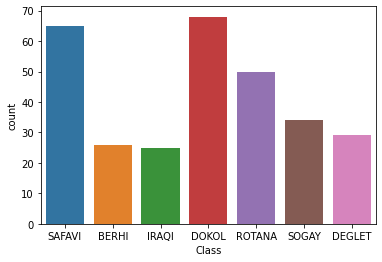

In [21]:
sns.countplot(x=y_test)

In [22]:
X_train.shape

(601, 34)

In [23]:
y_train.shape

(601,)

In [24]:
svc = SVC()

In [25]:
param_grid = {
    "C": np.arange(1, 10, 1),
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
    "degree": np.arange(1, 5, 1),
    "gamma": ["scale", "auto"]
}

In [26]:
grid_search = GridSearchCV(svc, param_grid, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 288 candidates, totalling 2880 fits


In [27]:
grid_search.best_params_

{'C': 8, 'degree': 1, 'gamma': 'scale', 'kernel': 'poly'}

In [28]:
final_model = SVC(C = 8, degree=1, gamma='scale',kernel='poly')
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       BERHI       0.92      0.85      0.88        26
      DEGLET       0.75      0.83      0.79        29
       DOKOL       0.94      0.96      0.95        68
       IRAQI       0.88      0.92      0.90        25
      ROTANA       0.94      0.96      0.95        50
      SAFAVI       0.97      0.97      0.97        65
       SOGAY       0.90      0.79      0.84        34

    accuracy                           0.92       297
   macro avg       0.90      0.90      0.90       297
weighted avg       0.92      0.92      0.92       297



In [33]:
print(confusion_matrix(y_test,y_pred))

[[22  0  0  3  1  0  0]
 [ 0 24  3  0  0  0  2]
 [ 0  3 65  0  0  0  0]
 [ 1  0  0 23  1  0  0]
 [ 1  0  0  0 48  0  1]
 [ 0  1  1  0  0 63  0]
 [ 0  4  0  0  1  2 27]]


<AxesSubplot:>

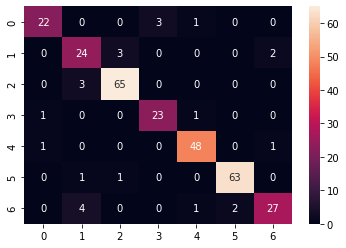

In [34]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True)